In [ ]:
#Required packages
import os, re, pandas as pd
import math
from pandas import DataFrame as df
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
from sklearn.metrics import calinski_harabasz_score
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

from google.colab import drive

drive.mount('/content/gdrive')
%cd '/content/gdrive/My Drive/'

Mounted at /content/gdrive
/content/gdrive/My Drive


**Clustering**

**I. Speed.**

In [ ]:
#INSERT your path to the dataset
df_driving_2k15 = pd.read_csv(filepath_or_buffer='CANReader/clustering_dataset.csv')

#Drop all rows with a "-1" under column "ECU280" (Speed ECU)
df_driving_2k15 = df_driving_2k15.drop(df_driving_2k15[df_driving_2k15['ECU280'] == -1].index)

df_driving_2k15.drop('DataSize', axis=1, inplace=True)
df_driving_2k15.drop('ModID', axis=1, inplace=True)
df_driving_2k15.drop('ModData', axis=1, inplace=True)
df_driving_2k15.drop('ECU300', axis=1, inplace=True)
df_driving_2k15.drop('ECU1F9', axis=1, inplace=True)
df_driving_2k15.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
df_driving_2k15.head()

,ModTime,ECU280
11,0,4.268831
45,0,4.231548
76,0,4.200480
110,0,4.200480
141,0,4.163197


In [ ]:
#INSERT your scaling function here.

scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(X=df_driving_2k15)

df_driving_2k15 = pd.DataFrame(scaled_df, columns=['ModTime', 'ECU280'])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'SSE')

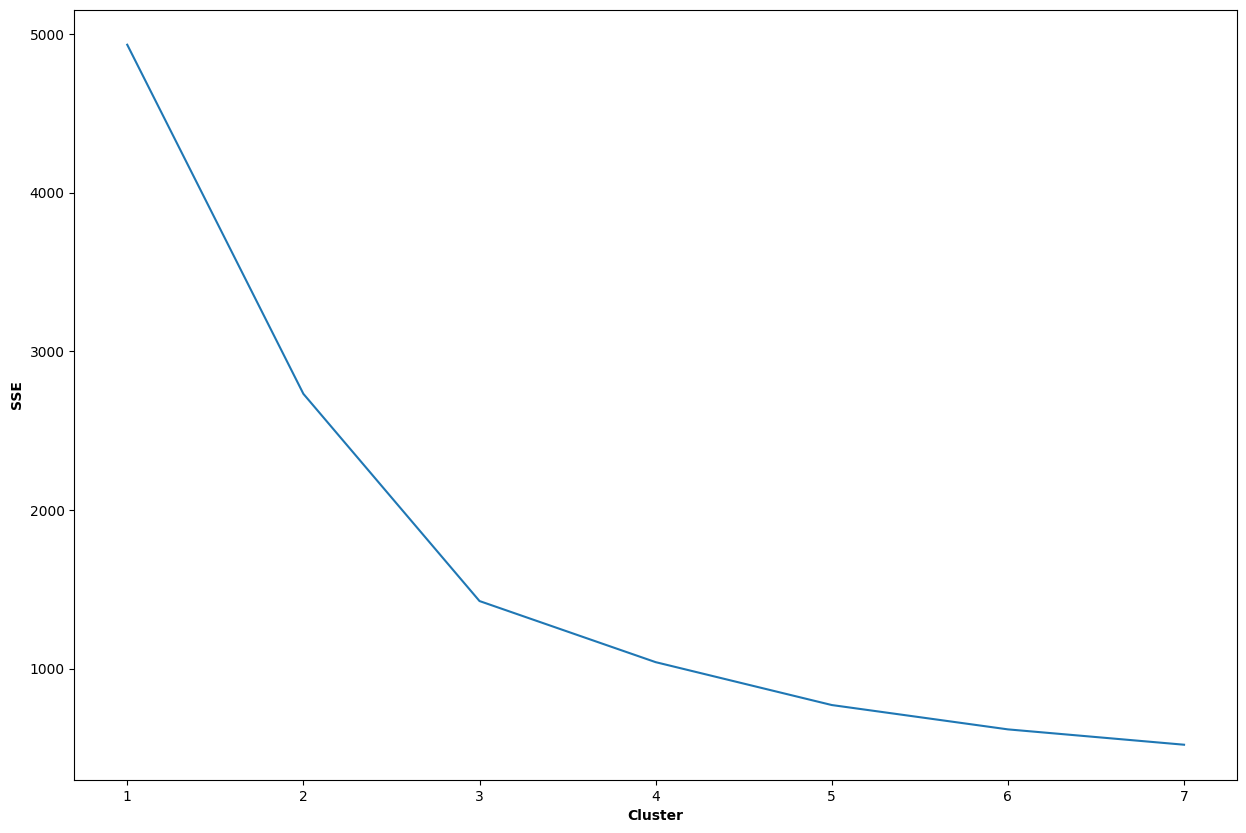

In [ ]:
#Obtaining the SSE for each cluster using elbow evaluation method

clus_range = range(1, 8)

sse_error_speed = []

plt.rcParams['figure.figsize'] = [15, 10]

for i in clus_range:
  df_speed_s1_kmeans_object_t1 = KMeans(n_clusters=i, init='k-means++', max_iter=df_driving_2k15.shape[0], random_state=2).fit(X=df_driving_2k15)
  df_speed_s1_kmeans_object_labels_t1 = KMeans(n_clusters=i, init='k-means++', max_iter=df_driving_2k15.shape[0], random_state=2).fit_predict(X=df_driving_2k15)
  sse_error_speed.append(df_speed_s1_kmeans_object_t1.inertia_)

fig, ax = plt.subplots()

#INSERT your code below for displaying SSE for each cluster

sns.lineplot(x=clus_range, y=sse_error_speed)
plt.xlabel("Cluster", fontweight='bold')
plt.ylabel("SSE", fontweight='bold')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Min, Max, Avg for Cluster 1: 13.166888290000001, 25.80560975, 21.53665337359869
Min, Max, Avg for Cluster 2: 0.0, 17.44193272, 7.212286442409175
Min, Max, Avg for Cluster 3: 0.0, 19.32469211, 10.595913289483102
The CH Score is: 351369.3904092556


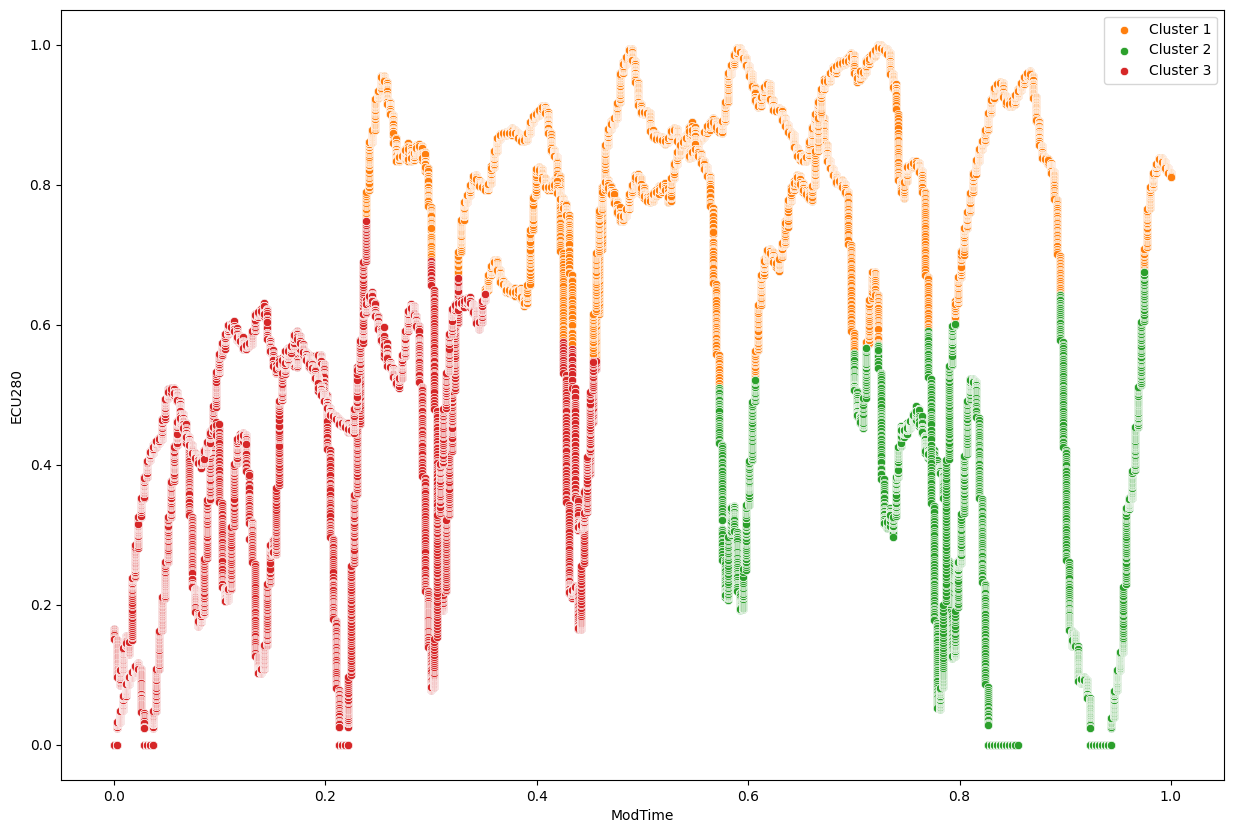

In [ ]:
plt.rcParams['figure.figsize'] = [15, 10]

df_0_speed_s1_t1 = pd.DataFrame()
df_1_speed_s1_t1 = pd.DataFrame()
df_2_speed_s1_t1 = pd.DataFrame()
df_3_speed_s1_t1 = pd.DataFrame()
df_4_speed_s1_t1 = pd.DataFrame()
df_5_speed_s1_t1 = pd.DataFrame()

df_speed_s1_kmeans_object_labels_t1 = KMeans(n_clusters=3, init='k-means++', max_iter=df_driving_2k15.shape[0], random_state=2).fit_predict(X=df_driving_2k15)

df_driving_2k15['KMClusterSpeed'] = df_speed_s1_kmeans_object_labels_t1

#Obtain the data points that belong to each cluster label (0, 1, 2)

df_0_speed_s1_t1 = df_driving_2k15[df_driving_2k15.KMClusterSpeed == 0]
df_1_speed_s1_t1 = df_driving_2k15[df_driving_2k15.KMClusterSpeed == 1]
df_2_speed_s1_t1 = df_driving_2k15[df_driving_2k15.KMClusterSpeed == 2]

#Plotting the data points

cluster_plot_t1 = sns.scatterplot(data=df_driving_2k15, x="ModTime", y="ECU280")
sns.scatterplot(data=df_0_speed_s1_t1, x="ModTime", y="ECU280", label='Cluster 1')
sns.scatterplot(data=df_1_speed_s1_t1, x="ModTime", y="ECU280", label='Cluster 2')
sns.scatterplot(data=df_2_speed_s1_t1, x="ModTime", y="ECU280", label='Cluster 3')

#Dropping Column KMClusterSpeed and Performing Inverse Transform

df_0_speed_s1_t1 = df_0_speed_s1_t1.drop('KMClusterSpeed', axis=1)
df_0_speed_s1_t1 = scaler.inverse_transform(df_0_speed_s1_t1)

df_1_speed_s1_t1 = df_1_speed_s1_t1.drop('KMClusterSpeed', axis=1)
df_1_speed_s1_t1 = scaler.inverse_transform(df_1_speed_s1_t1)

df_2_speed_s1_t1 = df_2_speed_s1_t1.drop('KMClusterSpeed', axis=1)
df_2_speed_s1_t1 = scaler.inverse_transform(df_2_speed_s1_t1)

#Obtaining Speed Values for each Cluster

temp_list0 = []
temp_list1 = []
temp_list2 = []

for i in range(len(df_0_speed_s1_t1)):
  temp_list0.append(df_0_speed_s1_t1[i][1])

for j in range(len(df_1_speed_s1_t1)):
  temp_list1.append(df_1_speed_s1_t1[j][1])

for k in range(len(df_2_speed_s1_t1)):
  temp_list2.append(df_2_speed_s1_t1[k][1])

#INSERT your code here for obtaining the min, max, and mean for each cluster

print("Min, Max, Avg for Cluster 1: {}, {}, {}".format(min(temp_list0), max(temp_list0), sum(temp_list0)/len(temp_list0)))
print("Min, Max, Avg for Cluster 2: {}, {}, {}".format(min(temp_list1), max(temp_list1), sum(temp_list1)/len(temp_list1)))
print("Min, Max, Avg for Cluster 3: {}, {}, {}".format(min(temp_list2), max(temp_list2), sum(temp_list2)/len(temp_list2)))

#Computing the Calinski-Harabasz Score

temp_list0.clear()
temp_list1.clear()
temp_list2.clear()

print("The CH Score is: {}".format(calinski_harabasz_score(df_driving_2k15, df_speed_s1_kmeans_object_labels_t1)))

**I.2. RPM.**

In [ ]:
df_driving_2k15 = pd.read_csv(filepath_or_buffer='CANReader/clustering_dataset.csv')

#Drop all rows with a "-1" under column "ECU1F9" (Tachometer/RPM ECU)
df_driving_2k15 = df_driving_2k15.drop(df_driving_2k15[df_driving_2k15['ECU1F9'] == -1].index)

df_driving_2k15.drop('DataSize', axis=1, inplace=True)
df_driving_2k15.drop('ModID', axis=1, inplace=True)
df_driving_2k15.drop('ModData', axis=1, inplace=True)
df_driving_2k15.drop('ECU300', axis=1, inplace=True)
df_driving_2k15.drop('ECU280', axis=1, inplace=True)
df_driving_2k15.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
#INSERT your scaling function here.

scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(X=df_driving_2k15)

df_driving_2k15 = pd.DataFrame(scaled_df, columns=['ModTime', 'ECU1F9'])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(-3.680555555555541, 0.5, 'Error')

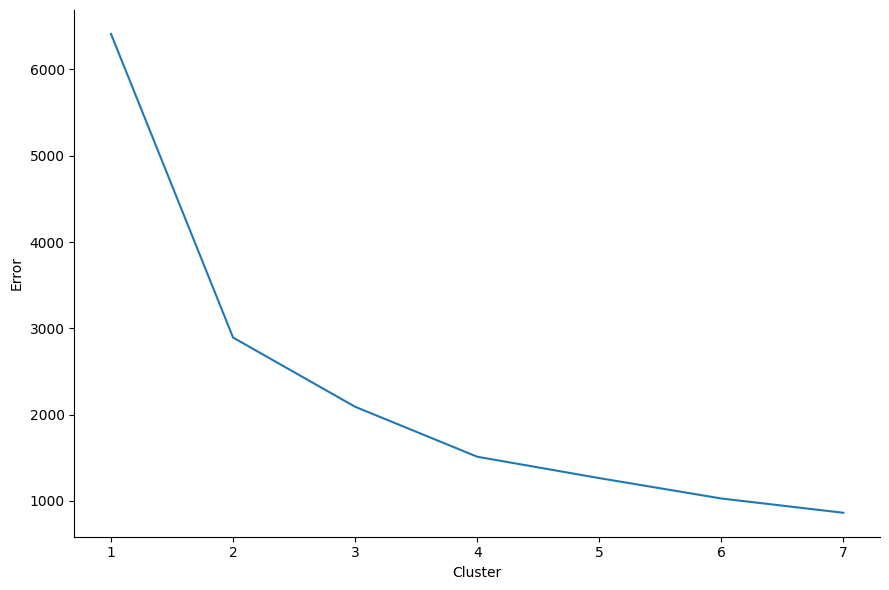

In [ ]:
clus_range = range(1, 8)

sse_error_rpm = []

for i in clus_range:
  df_rpm_s1_kmeans_object_t1 = KMeans(n_clusters=i, init='k-means++', max_iter=df_driving_2k15.shape[0]).fit(X=df_driving_2k15)
  df_rpm_s1_kmeans_object_labels_t1 = KMeans(n_clusters=i, init='k-means++', max_iter=df_driving_2k15.shape[0]).fit_predict(X=df_driving_2k15)
  sse_error_rpm.append(df_rpm_s1_kmeans_object_t1.inertia_)


#INSERT your code below for displaying SSE for each cluster

sns.relplot(x=clus_range, y=sse_error_rpm, kind="line", height=6, aspect=1.5)
plt.xlabel("Cluster")
plt.ylabel("Error")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Min, Max, Avg for Cluster 1: 510.0, 1397.5, 900.4058058925476
Min, Max, Avg for Cluster 2: 527.5, 1305.0, 875.5259350358099
Min, Max, Avg for Cluster 3: 1015.0, 1735.0, 1329.9584515606
The CH Score is: 509928.1527321416


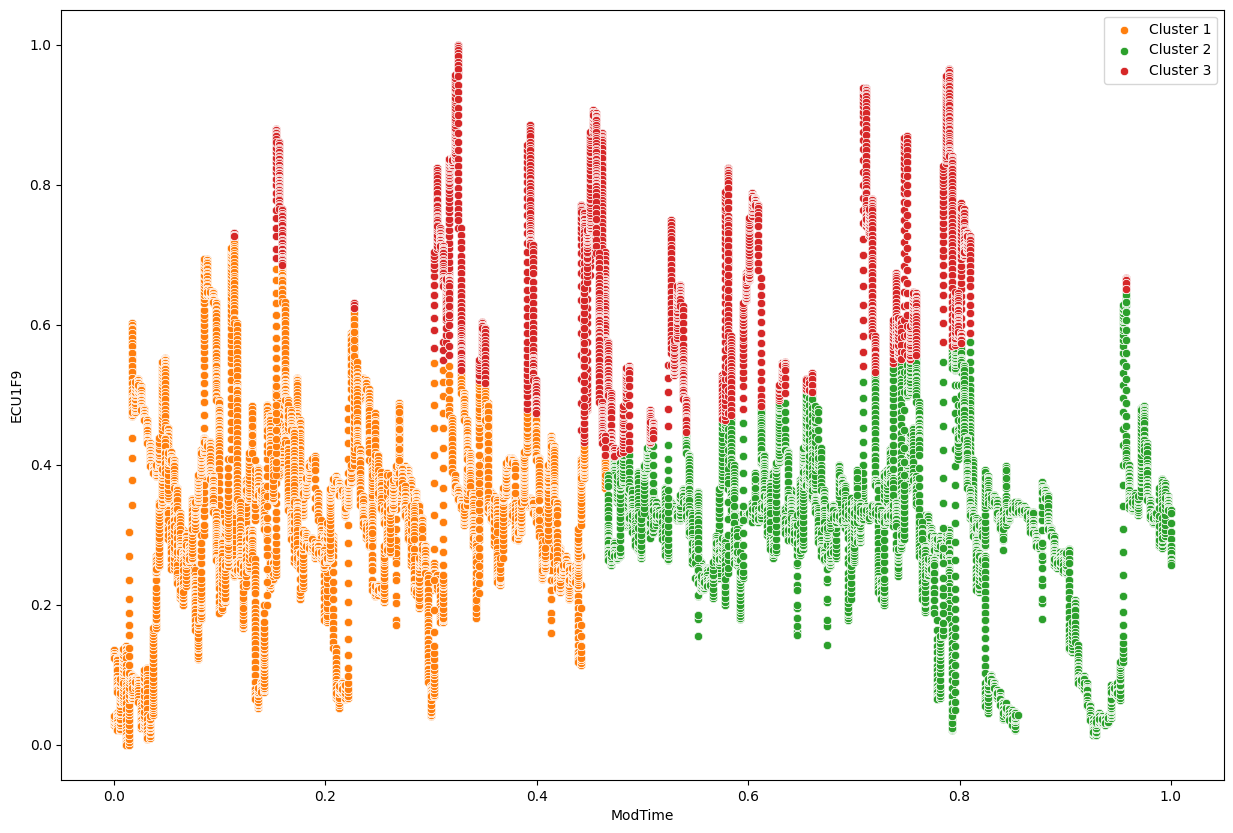

In [ ]:
plt.rcParams['figure.figsize'] = [15, 10]

df_0_rpm_s1_t2 = pd.DataFrame()
df_1_rpm_s1_t2 = pd.DataFrame()
df_2_rpm_s1_t2 = pd.DataFrame()
df_3_rpm_s1_t2 = pd.DataFrame()
df_4_rpm_s1_t2 = pd.DataFrame()

df_rpm_s1_kmeans_object_labels_t2 = KMeans(n_clusters=3, init='k-means++', max_iter=df_driving_2k15.shape[0]).fit_predict(X=df_driving_2k15)

df_driving_2k15['KMClusterRPM'] = df_rpm_s1_kmeans_object_labels_t2

#Obtain the data points that belong to each cluster label (0, 1, 2)

df_0_rpm_s1_t2 = df_driving_2k15[df_driving_2k15.KMClusterRPM == 0]
df_1_rpm_s1_t2 = df_driving_2k15[df_driving_2k15.KMClusterRPM == 1]
df_2_rpm_s1_t2 = df_driving_2k15[df_driving_2k15.KMClusterRPM == 2]

#Plotting the data points

cluster_plot_t4 = sns.scatterplot(data=df_driving_2k15, x="ModTime", y="ECU1F9")
sns.scatterplot(data=df_0_rpm_s1_t2, x="ModTime", y="ECU1F9", label='Cluster 1')
sns.scatterplot(data=df_1_rpm_s1_t2, x="ModTime", y="ECU1F9", label='Cluster 2')
sns.scatterplot(data=df_2_rpm_s1_t2, x="ModTime", y="ECU1F9", label='Cluster 3')

#Dropping Column KMClusterRPM and Performing Inverse Transform

df_0_rpm_s1_t2 = df_0_rpm_s1_t2.drop('KMClusterRPM', axis=1)
df_0_rpm_s1_t2 = scaler.inverse_transform(df_0_rpm_s1_t2)

df_1_rpm_s1_t2 = df_1_rpm_s1_t2.drop('KMClusterRPM', axis=1)
df_1_rpm_s1_t2 = scaler.inverse_transform(df_1_rpm_s1_t2)

df_2_rpm_s1_t2 = df_2_rpm_s1_t2.drop('KMClusterRPM', axis=1)
df_2_rpm_s1_t2 = scaler.inverse_transform(df_2_rpm_s1_t2)

#Obtaining Speed Values for each Cluster

temp_list0 = []
temp_list1 = []
temp_list2 = []

for i in range(len(df_0_rpm_s1_t2)):
  temp_list0.append(df_0_rpm_s1_t2[i][1])

for j in range(len(df_1_rpm_s1_t2)):
  temp_list1.append(df_1_rpm_s1_t2[j][1])

for k in range(len(df_2_rpm_s1_t2)):
  temp_list2.append(df_2_rpm_s1_t2[k][1])

#INSERT your code here for obtaining the min, max, and mean for each cluster

print("Min, Max, Avg for Cluster 1: {}, {}, {}".format(min(temp_list0), max(temp_list0), sum(temp_list0)/len(temp_list0)))
print("Min, Max, Avg for Cluster 2: {}, {}, {}".format(min(temp_list1), max(temp_list1), sum(temp_list1)/len(temp_list1)))
print("Min, Max, Avg for Cluster 3: {}, {}, {}".format(min(temp_list2), max(temp_list2), sum(temp_list2)/len(temp_list2)))

#Computing the Calinski-Harabasz Score

temp_list0.clear()
temp_list1.clear()
temp_list2.clear()

print("The CH Score is: {}".format(calinski_harabasz_score(df_driving_2k15, df_rpm_s1_kmeans_object_labels_t2)))

**I.3. Steering.**

In [ ]:
#Steering

df_driving_2k15 = pd.read_csv(filepath_or_buffer='CANReader/clustering_dataset.csv')

#Drop all rows with a "-1" under column "ECU300" (Steering Torque ECU)
df_driving_2k15 = df_driving_2k15.drop(df_driving_2k15[df_driving_2k15['ECU300'] == -1].index)

df_driving_2k15.drop('DataSize', axis=1, inplace=True)
df_driving_2k15.drop('ModID', axis=1, inplace=True)
df_driving_2k15.drop('ModData', axis=1, inplace=True)
df_driving_2k15.drop('ECU1F9', axis=1, inplace=True)
df_driving_2k15.drop('ECU280', axis=1, inplace=True)
df_driving_2k15.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
#INSERT your scaling function here.

scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(X=df_driving_2k15)

df_driving_2k15 = pd.DataFrame(scaled_df, columns=['ModTime', 'ECU300'])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(-3.680555555555541, 0.5, 'Error')

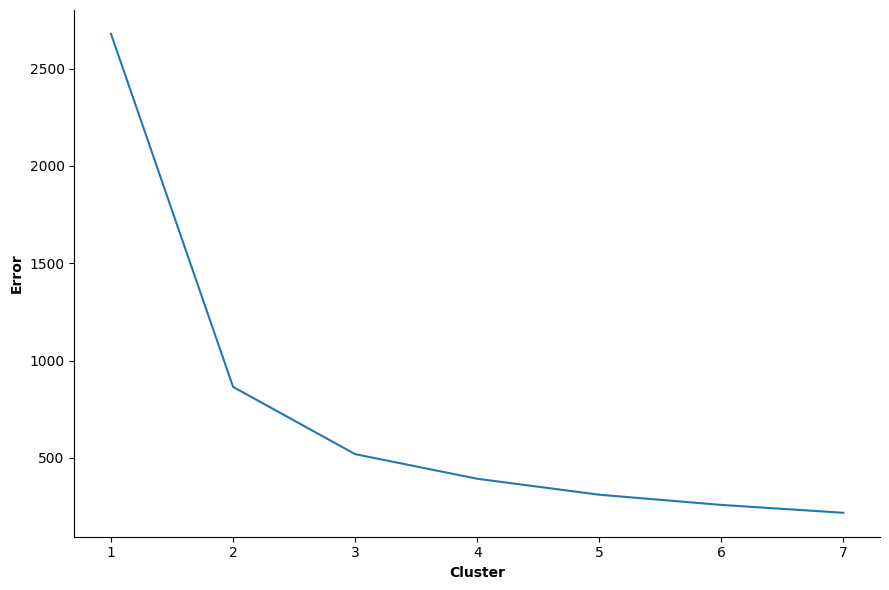

In [ ]:
clus_range = range(1, 8)

plt.rcParams['figure.figsize'] = [15, 10]
sse_error_steering = []

for i in clus_range:
  df_steering_5min_s1_kmeans_object_t1 = KMeans(n_clusters=i, init='k-means++', max_iter=df_driving_2k15.shape[0]).fit(X=df_driving_2k15)
  df_steering_5min_s1_kmeans_object_labels_t1 = KMeans(n_clusters=i, init='k-means++', max_iter=df_driving_2k15.shape[0]).fit_predict(X=df_driving_2k15)
  sse_error_steering.append(df_steering_5min_s1_kmeans_object_t1.inertia_)

#INSERT your code below for displaying SSE for each cluster

sns.relplot(x=clus_range, y=sse_error_steering, kind="line", height=6, aspect=1.5)
plt.xlabel("Cluster", fontweight='bold')
plt.ylabel("Error", fontweight='bold')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Min, Max, Avg for Cluster 1: 0.0, 31.0, 6.845416741999639
Min, Max, Avg for Cluster 2: 0.0, 69.0, 10.496945551128817
Min, Max, Avg for Cluster 3: 0.0, 38.0, 7.160857391136429
The CH Score is: 742231.4077675948


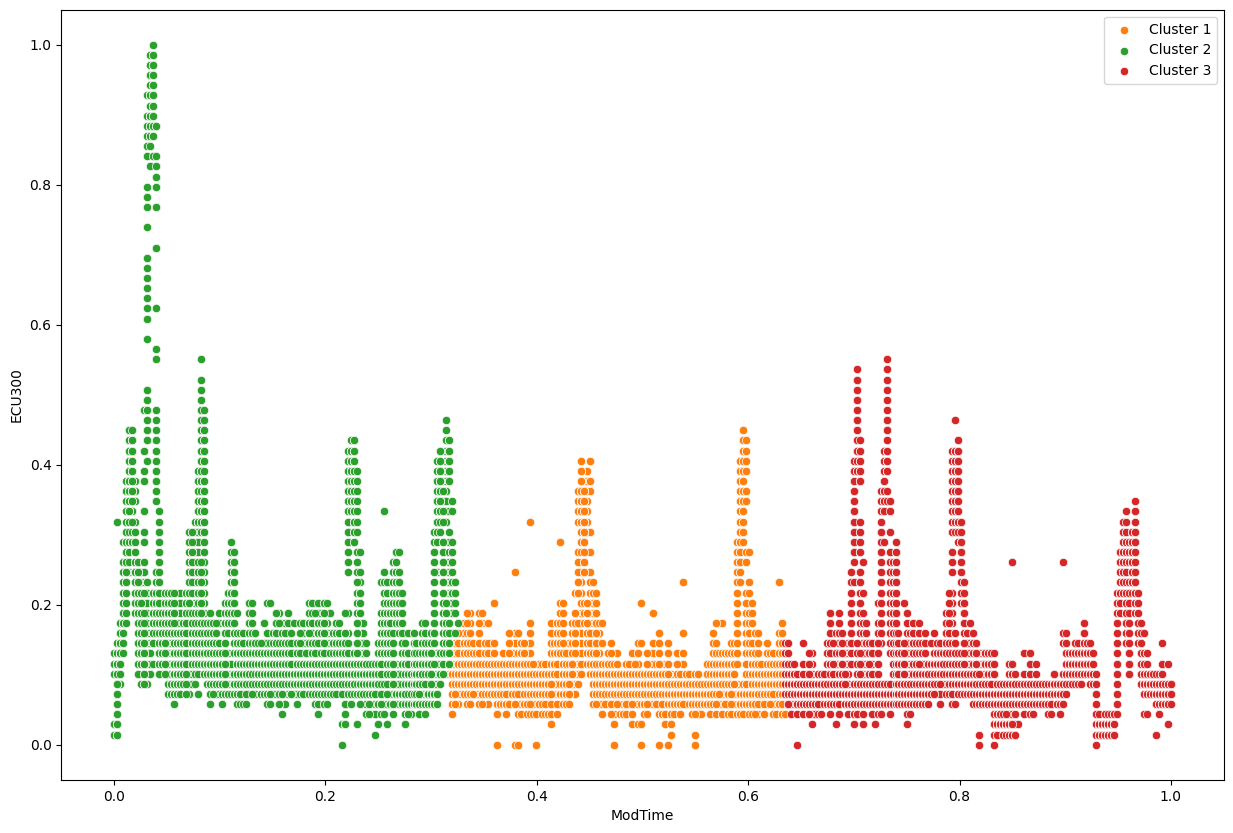

In [ ]:
plt.rcParams['figure.figsize'] = [15, 10]

df_0_steering_s1_t3 = pd.DataFrame()
df_1_steering_s1_t3 = pd.DataFrame()
df_2_steering_s1_t3 = pd.DataFrame()
df_3_steering_s1_t3 = pd.DataFrame()
df_4_steering_s1_t3 = pd.DataFrame()
df_5_steering_s1_t3 = pd.DataFrame()

# for i in clus_range:
df_steering_s1_kmeans_object_labels_t3 =  KMeans(n_clusters=3, init='k-means++', max_iter=df_driving_2k15.shape[0]).fit_predict(X=df_driving_2k15)

df_driving_2k15['KMClusterSteering'] = df_steering_s1_kmeans_object_labels_t3


#Obtain the data points that belong to each cluster label (0, 1, 2)

df_0_steering_s1_t3 = df_driving_2k15[df_driving_2k15.KMClusterSteering == 0]
df_1_steering_s1_t3 = df_driving_2k15[df_driving_2k15.KMClusterSteering == 1]
df_2_steering_s1_t3 = df_driving_2k15[df_driving_2k15.KMClusterSteering == 2]

#Plotting the data points

cluster_plot_t3= sns.scatterplot(data=df_driving_2k15, x="ModTime", y="ECU300")
sns.scatterplot(data=df_0_steering_s1_t3, x="ModTime", y="ECU300", label='Cluster 1')
sns.scatterplot(data=df_1_steering_s1_t3, x="ModTime", y="ECU300", label='Cluster 2')
sns.scatterplot(data=df_2_steering_s1_t3, x="ModTime", y="ECU300", label='Cluster 3')

#Dropping Column KMClusterSteering and Performing Inverse Transform

df_0_steering_s1_t3 = df_0_steering_s1_t3.drop('KMClusterSteering', axis=1)
df_0_steering_s1_t3 = scaler.inverse_transform(df_0_steering_s1_t3)

df_1_steering_s1_t3 = df_1_steering_s1_t3.drop('KMClusterSteering', axis=1)
df_1_steering_s1_t3 = scaler.inverse_transform(df_1_steering_s1_t3)

df_2_steering_s1_t3 = df_2_steering_s1_t3.drop('KMClusterSteering', axis=1)
df_2_steering_s1_t3 = scaler.inverse_transform(df_2_steering_s1_t3)

#Obtaining Speed Values for each Cluster

temp_list0 = []
temp_list1 = []
temp_list2 = []

for i in range(len(df_0_steering_s1_t3)):
  temp_list0.append(df_0_steering_s1_t3[i][1])

for j in range(len(df_1_steering_s1_t3)):
  temp_list1.append(df_1_steering_s1_t3[j][1])

for k in range(len(df_2_steering_s1_t3)):
  temp_list2.append(df_2_steering_s1_t3[k][1])

#INSERT your code here for obtaining the min, max, and mean for each cluster

print("Min, Max, Avg for Cluster 1: {}, {}, {}".format(min(temp_list0), max(temp_list0), sum(temp_list0)/len(temp_list0)))
print("Min, Max, Avg for Cluster 2: {}, {}, {}".format(min(temp_list1), max(temp_list1), sum(temp_list1)/len(temp_list1)))
print("Min, Max, Avg for Cluster 3: {}, {}, {}".format(min(temp_list2), max(temp_list2), sum(temp_list2)/len(temp_list2)))

#Computing the Calinski-Harabasz Score

temp_list0.clear()
temp_list1.clear()
temp_list2.clear()

print("The CH Score is: {}".format(calinski_harabasz_score(df_driving_2k15, df_steering_s1_kmeans_object_labels_t3)))